<a href="https://colab.research.google.com/github/PawanSorte/Assgn_3/blob/main/Assignment_3PCA_and_kmeans_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name** - Pawan Sorte
#**Email ID** - Pawan.sorte@mitaoe.ac.in
#**Preference** - Machine Learning



#**Problem Statement** - Implement the K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.


#The algorithm must be implemented as a function with arguments (dataset)


#The algorithm must be implemented as a function with arguments, x_train (the features) and y_train (the output).


#The Code is written and compiled in Google Colab 
#**Python Version - 3.9**


#First install the allowable libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load the dataset in a variable

In [ ]:
iris_df = pd.read_csv(r'/content/Iris Dataset.csv')

#View the shape of the data

In [ ]:
iris_df.shape

(150, 6)

#Standardizing the dataset.

In [ ]:
#first find out the column names
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#since id column is of no use drop that.
iris_df = iris_df.drop('Id', axis = 1)

In [ ]:
#display the first five rows of each column
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#now calculate mean of each row
SepalLengthCm_mean = iris_df['SepalLengthCm'].mean()
SepalWidthCm_mean = iris_df['SepalWidthCm'].mean()
PetalLengthCm_mean = iris_df['PetalLengthCm'].mean()
PetalWidthCm_mean = iris_df['PetalWidthCm'].mean()

In [ ]:
newSepalLengthCm = [] #create an empty list for each attribute
newSepalWidthCm = []
newPetalLengthCm = []
newPetalWidthCm = []

#Using a for loop to get each value of original dataset column and standardizing it to new list
for x in range(len(iris_df)):
  s1 = SepalLengthCm_mean - iris_df.loc[x]['SepalLengthCm']
  newSepalLengthCm.append(s1)

  s2 = SepalWidthCm_mean - iris_df.loc[x]['SepalWidthCm']
  newSepalWidthCm.append(s2)

  s3 = PetalLengthCm_mean - iris_df.loc[x]['PetalLengthCm']
  newPetalLengthCm.append(s3)

  s4 = PetalWidthCm_mean - iris_df.loc[x]['PetalWidthCm']
  newPetalWidthCm.append(s4)

Now take all the list with standardized values and make a pandas dataframe with it.

In [ ]:
new_iris_df = pd.DataFrame(list(zip(newSepalLengthCm , newSepalWidthCm ,newPetalLengthCm , newPetalWidthCm)),columns =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [ ]:
#convert it into a numpy array
new_iris_df = new_iris_df.values


#Now find the covariance matrix 

In [ ]:
X_covariance_matrix = np.cov(new_iris_df.T)
X_covariance_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

#Find out Eigen values and Eigen vectors for the same dataset.

In [ ]:
eig_vals , eig_vecs = np.linalg.eig(X_covariance_matrix)

print("The Eigen Vectors are", eig_vecs)
print('\n The Eigen Values are',eig_vals)


The Eigen Vectors are [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

 The Eigen Values are [4.22484077 0.24224357 0.07852391 0.02368303]


#Sorting of the Eigen values and vectors.

In [ ]:
#make a list of eigen values and eigen vectors and convert them to a tuple.
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range (len(eig_vals))]

#Sort them from low to high
eig_pairs.sort(key = lambda x: x[0], reverse = True)

#print the output
for i in eig_pairs:
  print(i[0])

4.224840768320108
0.24224357162751511
0.07852390809415467
0.02368302712600035


#Captured variance in the dataset.

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals , reverse = True)] #variance of individual component
cum_var_exp = np.cumsum(var_exp) #cumulative variance captured

print('Variance captured for individual component is \n' , var_exp)
print(50 * '*')
print('Cumulative variance captured \n',cum_var_exp )

Variance captured for individual component is 
 [92.46162071742684, 5.301556785053503, 1.7185139525006832, 0.518308545018959]
**************************************************
Cumulative variance captured 
 [ 92.46162072  97.7631775   99.48169145 100.        ]


#So the first two eigen vectors contribute 97.76% of total variance of the dataset, we can have them as our attributes

#Now create a matrix which corresponds to eigen vectors  of the topmost eigen values....

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
#using horizonatal stack function of numpy such that eigen pairs are reshaped to a same sjhape for stacking. 
matrix_w

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

#Element projection

In [ ]:
Y = new_iris_df.dot(matrix_w)
print(Y[0:5])

[[ 2.68420713  0.32660731]
 [ 2.71539062 -0.16955685]
 [ 2.88981954 -0.13734561]
 [ 2.7464372  -0.31112432]
 [ 2.72859298  0.33392456]]


#Code for K-Means Clustering

Since we know that first two components of new_iris_df has the most covariance conservation of all it is best suited for us to use just two of them to feeding our K-means clusterer algorithm.

In [ ]:
df = pd.DataFrame(list(zip(newSepalLengthCm , newSepalWidthCm , iris_df['Species'])),columns =['x', 'y','Cluster'])

In the above code we have used the standardized values of the features for better computational efficiency.

Now we find out the unique values of the target variable Species and then map them to 0,1 and 2.

In [ ]:
df['Cluster'].unique() #to find the unique values

df['Cluster'] = df['Cluster'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0 , 1 , 2])
# setosa ,versicolor and virginica with 0 ,1 ,2 

df['Cluster'].unique() #to find the remapped unique values

array([0, 1, 2])

Review the dataset again with new values

In [ ]:
df

,x,y,Cluster
0,0.743333,-0.446,0
1,0.943333,0.054,0
2,1.143333,-0.146,0
3,1.243333,-0.046,0
4,0.843333,-0.546,0
...,...,...,...
145,-0.856667,0.054,2
146,-0.456667,0.554,2
147,-0.656667,0.054,2
148,-0.356667,-0.346,2


Initialize the centroids for the clusterer

In [ ]:
centroids = {} #Initialize an empty set. 

for i in range(3):  #initializing a for loop 
  result_list = []  #stating an empty set.
  result_list.append(df.loc[df['Cluster'] == i]['x'].mean())  #appends the mean value of x independant variable for 0 , 1 , 2
  result_list.append(df.loc[df['Cluster'] == i]['y'].mean())  #appends the mean value of y independant variable for 0 , 1 , 2

  centroids[i] = result_list

centroids

{0: [0.8373333333333338, -0.3639999999999997],
 1: [-0.09266666666666627, 0.28400000000000025],
 2: [-0.7446666666666664, 0.08000000000000028]}

Plotting the points.

Text(0.5, 0, 'Sepal Width')

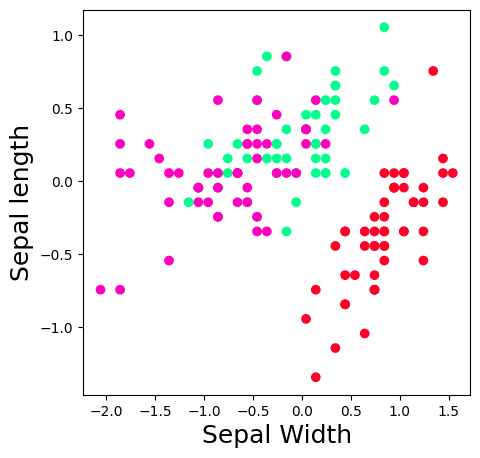

In [ ]:
fig = plt.figure(figsize = (5 , 5))
plt.scatter(df['x'] , df['y'] , c = df.Cluster , cmap = 'gist_rainbow')
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)

Define the colors and plotting centroids for all the clusters

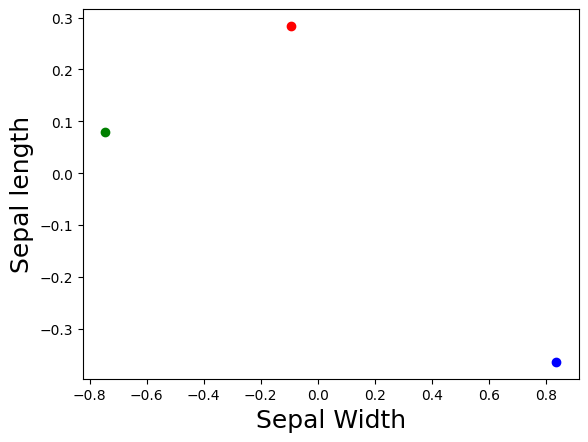

In [ ]:
colmap = {0:"b" , 1:'r' , 2 : 'g'}  # assigning values to each class using a dictionary

for i in range(3):  #initialize a for loop 
  plt.scatter(centroids[i][0] , centroids[i][1] , color = colmap[i]) #and plot the centroids of clusters with their respective colors
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()

 Now Show the complete graph

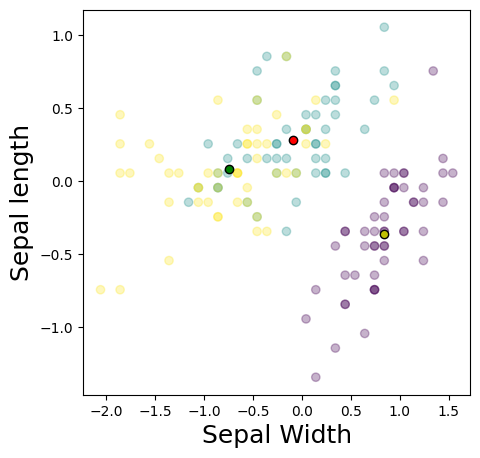

In [ ]:
fig = plt.figure(figsize = (5 , 5))
plt.scatter(df['x'] , df['y'] , c = df.Cluster  , alpha = 0.3 )
col = [0,1]
colmap = {0:"y" , 1:'r' , 2 : 'g'}  # assigning values to each class using a dictionary

for i in range(3):  #initialize a for loop 
  plt.scatter(centroids[i][0] , centroids[i][1] , color = colmap[i] , edgecolor= 'k') #and plot the centroids of clusters with their respective colors
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()

Now calculating distance from centroid and updating our dataframe.

In [ ]:
def assignment(df, centroids):
    # Calculate the distance from each data point to each centroid
    for i in range(3):  # Number of classes determines the range values
        # Calculate the Euclidean distance from each data point to the i-th centroid
        df['distance_from{}'.format(i)] = np.sqrt(
            (df['x'] - centroids[i][0]) ** 2
            + (df['y'] - centroids[i][1]) ** 2
        )
    
    # Create a list of column names for distance from each centroid
    centroid_distance_cols = ['distance_from{}'.format(i) for i in range(3)]
    
    # Find the closest centroid for each data point and assign it as the 'closest' column
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    # Extract the cluster index from the 'closest' column by removing the 'distance_from' prefix
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from{}')))
    
    # Map the cluster index to a color for visualization purposes
    df['color'] = df['closest'].map(lambda x: colmap[x])
    
    return df


In [ ]:
df = assignment(df , centroids)
df

,x,y,Cluster,distance_from0,distance_from1,distance_from2,closest,color
0,0.743333,-0.446,0,0.124740,1.109863,1.578233,0,y
1,0.943333,0.054,0,0.431231,1.061224,1.688200,0,y
2,1.143333,-0.146,0,0.375713,1.308662,1.901478,0,y
3,1.243333,-0.046,0,0.515713,1.376153,1.991989,0,y
4,0.843333,-0.546,0,0.182099,1.250998,1.706933,0,y
...,...,...,...,...,...,...,...,...
145,-0.856667,0.054,2,1.744809,0.797870,0.114978,2,g
146,-0.456667,0.554,2,1.586556,0.453206,0.554635,1,r
147,-0.656667,0.054,2,1.551374,0.609094,0.091761,2,g
148,-0.356667,-0.346,2,1.194136,0.683078,0.576212,2,g


#Cluster Visualization with colors

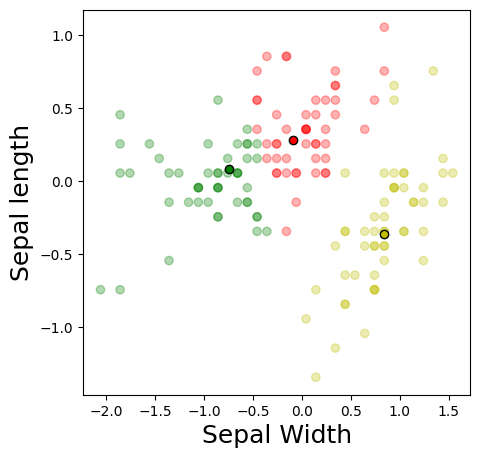

In [ ]:
fig = plt.figure(figsize=(5, 5))

# Scatter plot the data points with colors based on their assigned clusters
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)

# Plot the centroids as individual points
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

# Display the plot
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()

#Now update the clusters with new points

In [ ]:
def update(k):
    # Update the centroids based on the mean of the data points assigned to each cluster
    for i in range(3):
        # Calculate the mean x-coordinate of the data points in cluster i
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        # Calculate the mean y-coordinate of the data points in cluster i
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    
    # Return the updated value of k (assuming k is a variable being modified within the function)
    return k


Call the function update and give centroids as its arguments.

In [ ]:
centroids = update(centroids)
centroids

{0: [0.8338993710691829, -0.319584905660377],
 1: [0.037210884353741945, 0.36012244897959217],
 2: [-0.9587499999999998, -0.014749999999999716]}

Visualize the graph with updated centroids

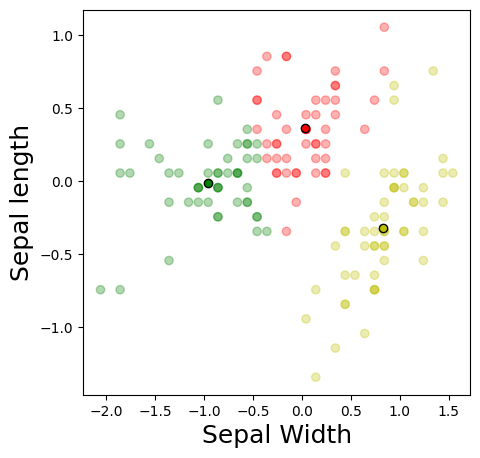

In [ ]:
fig = plt.figure(figsize=(5, 5))

# Scatter plot the data points with colors based on their assigned clusters
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)

# Plot the centroids as individual points
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

# Display the plot
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()

Reassign the clusters for new centroid calculations

In [ ]:
df = assignment(df , centroids)

Visualize the graph again with updated centroids and cluster reassignment.

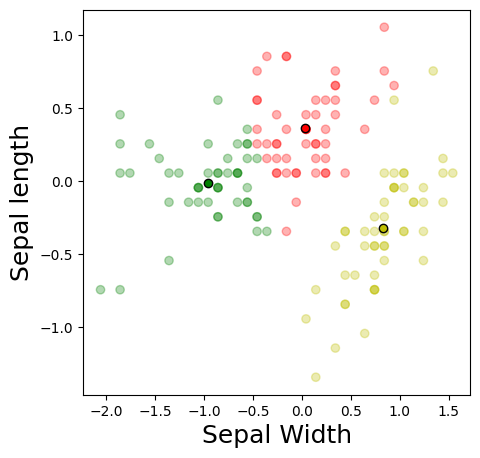

In [ ]:
fig = plt.figure(figsize=(5, 5))

# Scatter plot the data points with colors based on their assigned clusters
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)

# Plot the centroids as individual points
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

# Display the plot
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()

Continue this reassignment stage until it does not change for the next consecutive iteration

In [ ]:
while True:
    # Create a copy of the 'closest' column to track the previous closest centroids
    closest_centroids = df['closest'].copy(deep=True)
    
    # Update the centroids based on the current assignments
    centroids = update(centroids)
    
    # Assign the data points to the closest centroids
    df = assignment(df, centroids)
    
    # Check if the current assignments are the same as the previous ones
    if closest_centroids.equals(df['closest']):
        # If the assignments have not changed, break the loop and exit
        break


#Final Visualization

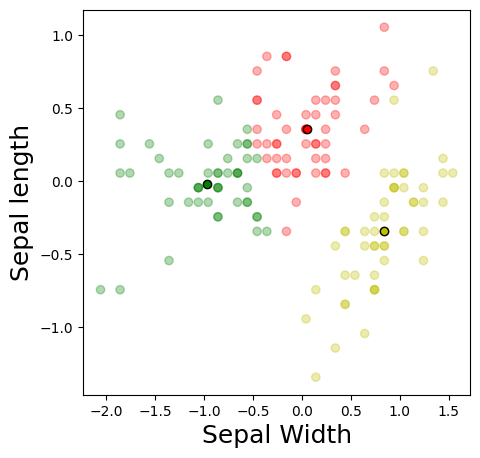

In [ ]:
fig = plt.figure(figsize=(5, 5))

# Scatter plot the data points with colors based on their assigned clusters
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)

# Plot the centroids as individual points
for i in range(3):
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

# Display the plot
plt.ylabel("Sepal length" , fontsize = 18)
plt.xlabel("Sepal Width" , fontsize = 18)
plt.show()